# Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Data Loading

In [2]:
df=pd.read_csv('/content/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Data Preprocessing

In [5]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [6]:
df['Status']=df['Status'].map({'Developed':1,'Developing':0})
df['Status'].unique()

array([0, 1])

In [7]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [8]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [9]:
df[df.isnull().any(axis=1)]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,0,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,0,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,0,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,0,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,0,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,0,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,0,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,0,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,0,43.8,614.0,44,2.62,45.616880,NaN,30930,...,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])

<Axes: >

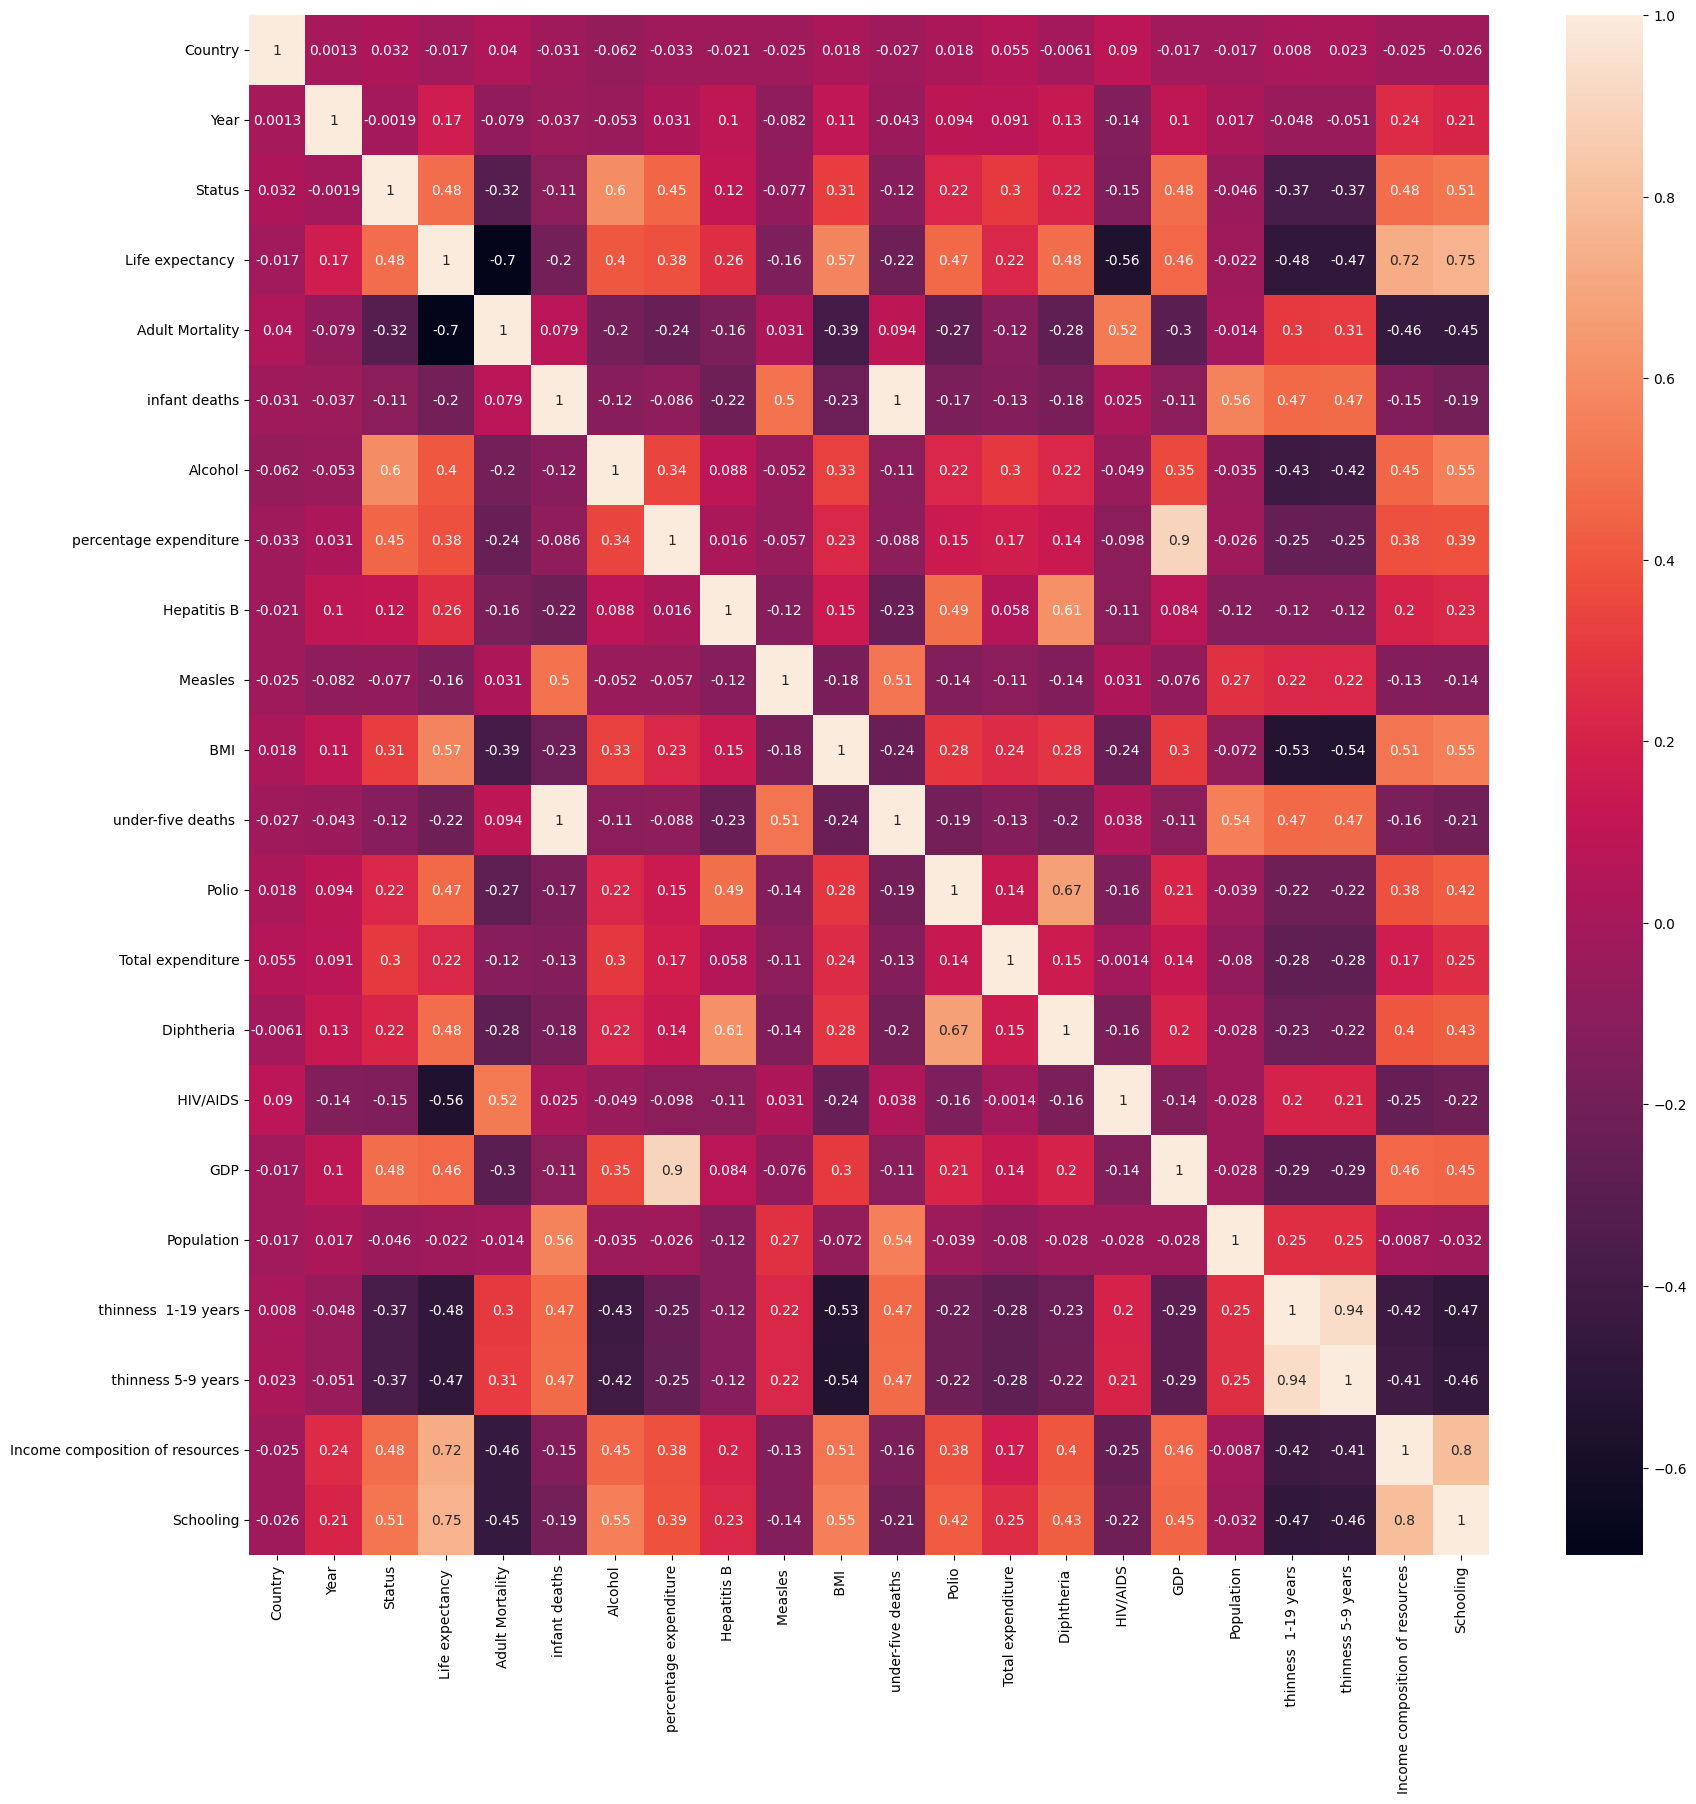

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

**Droping the Country feature as it has very less dependence with other features**

<Axes: >

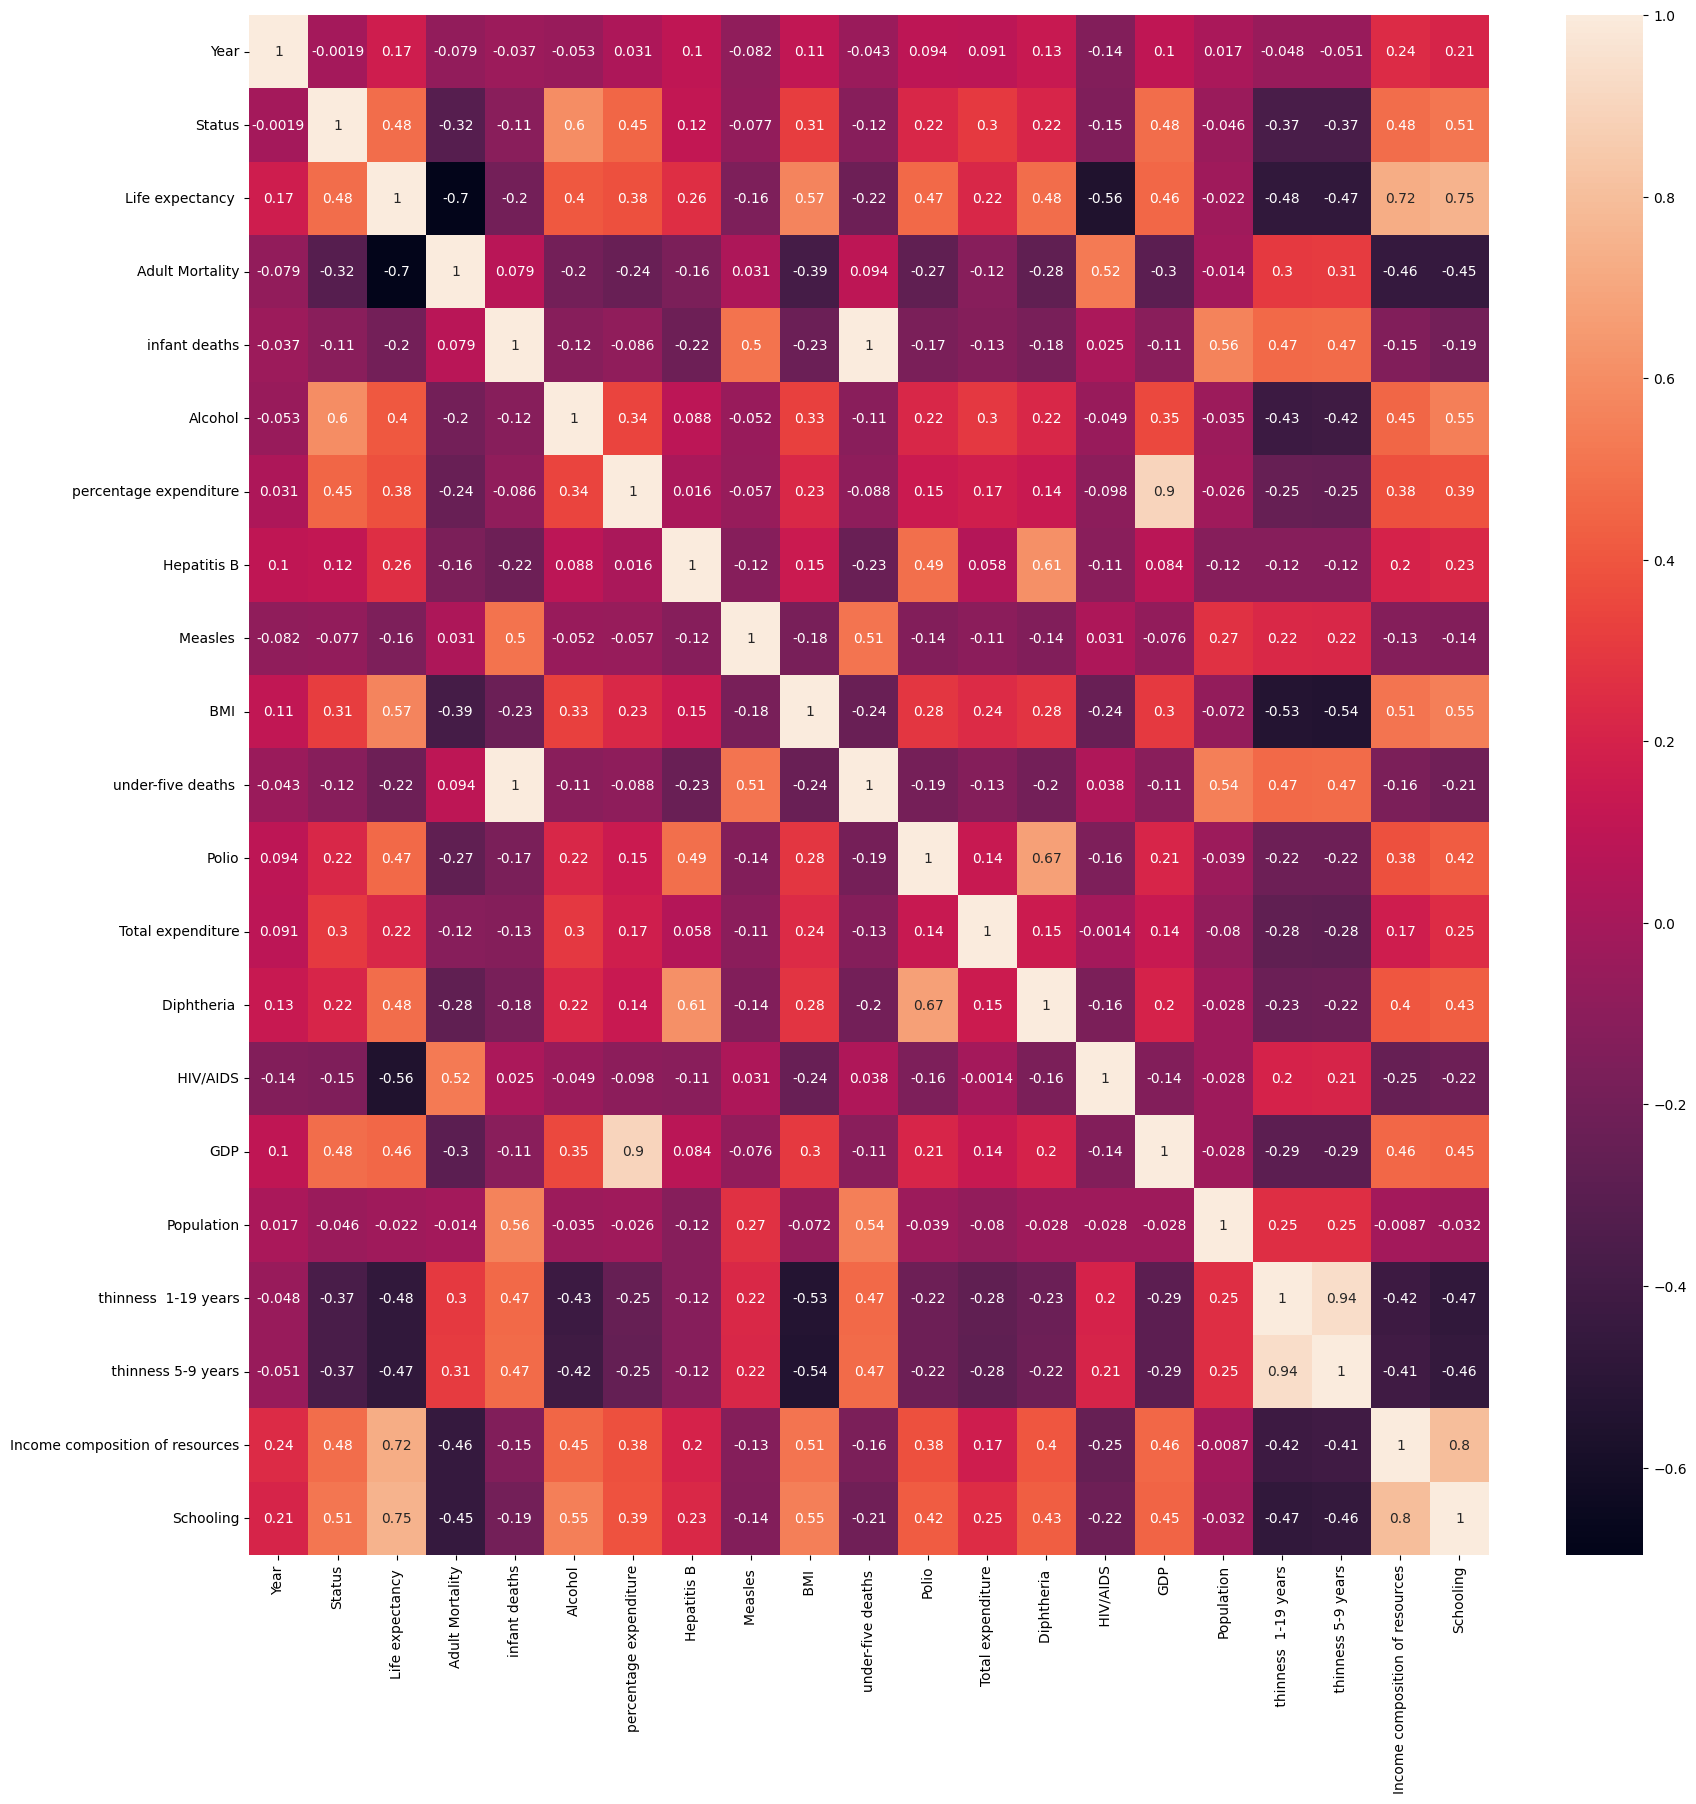

In [12]:
plt.figure(figsize=(20,20))
df.drop('Country',axis=1,inplace=True)
sns.heatmap(df.corr(),annot=True)

In [13]:
df.skew()

,0
Year,-0.006409
Status,1.718238
Life expectancy,-0.638605
Adult Mortality,1.174369
infant deaths,9.786963
Alcohol,0.589563
percentage expenditure,4.652051
Hepatitis B,-1.930845
Measles,9.441332
BMI,-0.219312


**Based on skewness, the null value columns are divided into two categories. If skewness is beteen -1 and 1, we apply mean and if greater, we apply median**

In [14]:
median=[]
mean=[]
for i in df.columns:
  if df[i].isnull().any():
    if abs(df[i].skew())>1:
      median.append(i)
    else:
      mean.append(i)


In [15]:
mean

['Life expectancy ', 'Alcohol', ' BMI ', 'Total expenditure', 'Schooling']

In [16]:
median

['Adult Mortality',
 'Hepatitis B',
 'Polio',
 'Diphtheria ',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources']

In [17]:
for i in mean:
  df[i]=df[i].fillna(df[i].mean())
for i in median:
  df[i]=df[i].fillna(df[i].median())

In [18]:
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [19]:
df.isnull().sum()

,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0
BMI,0


In [20]:
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,0,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,0,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [21]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [22]:
df.columns = df.columns.str.strip()

**Checking for outliers in the target feature- 'Life expectancy'**

<Axes: ylabel='Life expectancy'>

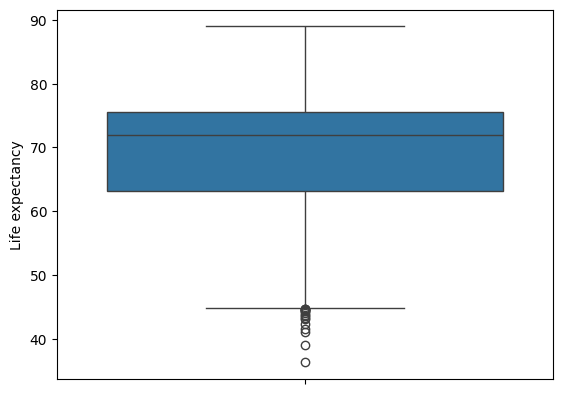

In [23]:
sns.boxplot(df['Life expectancy'])

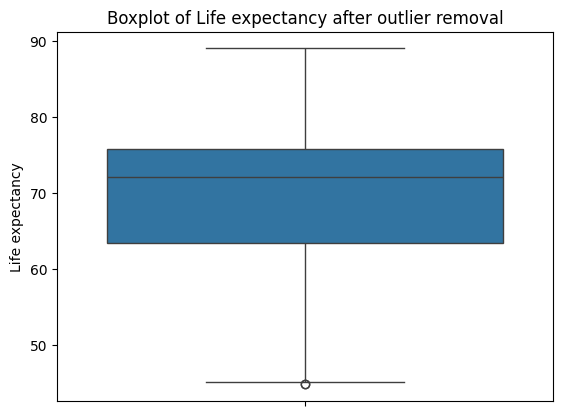

In [24]:
Q1 = df['Life expectancy'].quantile(0.25)
Q3 = df['Life expectancy'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Life expectancy'] >= lower_bound) & (df['Life expectancy'] <= upper_bound)]
sns.boxplot(df['Life expectancy'])
plt.title('Boxplot of Life expectancy after outlier removal')
plt.ylabel('Life expectancy')
plt.show()

In [25]:
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,2007,0,46.6,67.0,29,3.88,29.814566,72.0,242,28.2,...,73.0,4.47,73.0,23.7,396.998217,1332999.0,8.2,8.2,0.414,9.6
2931,2006,0,45.4,7.0,28,4.57,34.262169,68.0,212,27.9,...,71.0,5.12,7.0,26.8,414.796232,13124267.0,8.6,8.6,0.408,9.5
2935,2002,0,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,0,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# Model Training

In [26]:
y=df['Life expectancy']
x=df.drop('Life expectancy',axis=1)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [29]:
y_train=np.array(y_train)
y_train

array([58.4, 48. , 72.5, ..., 61.1, 80. , 59.4])

# Multiple Linear Regression without Lasso(L1) Regularization

In [30]:
def func(x,w,b):
  return np.dot(x,w)+b

In [36]:
m=len(x_train)
def gd(x_train,y_train,w,b):
  w_grad=np.zeros((x_train.shape[1]))
  b_grad=0
  for i in range(m):
    y_pred=func(x_train[i],w,b)
    w_grad+=(y_pred-y_train[i])*x_train[i]
    b_grad+=(y_pred-y_train[i])
  w_grad=w_grad/m
  b_grad=b_grad/m
  return w_grad,b_grad

In [37]:
def gradient(x_train,y_train,w,b,iters,lr):
  for i in range(iters):
    w_,b_=gd(x_train,y_train,w,b)
    w=w-lr*w_
    b=b-lr*b_
  return w,b

In [41]:
lr=0.01
iters=1000
w=np.zeros((x_train.shape[1]))
b=0
w, b = gradient(x_train, y_train, w, b, iters, lr)
print("Weights:", w)
print("Bias:", b)

Weights: [-0.07672237  0.4973872  -2.55486632  0.26533662  0.15407942  0.1919288
 -0.42644949 -0.39779182  0.81716662 -0.47682388  0.68686522  0.24774951
  1.10868145 -2.3319614   0.39873942  0.13308694 -0.25759709 -0.0493459
  1.34230579  2.11027202]
Bias: 69.41297045793313


In [42]:
y_pred=func(x_train,w,b)
from sklearn.metrics import r2_score
r2 = r2_score(y_train, y_pred)
print(f"R-squared score: {r2}")

R-squared score: 0.8129341432586455


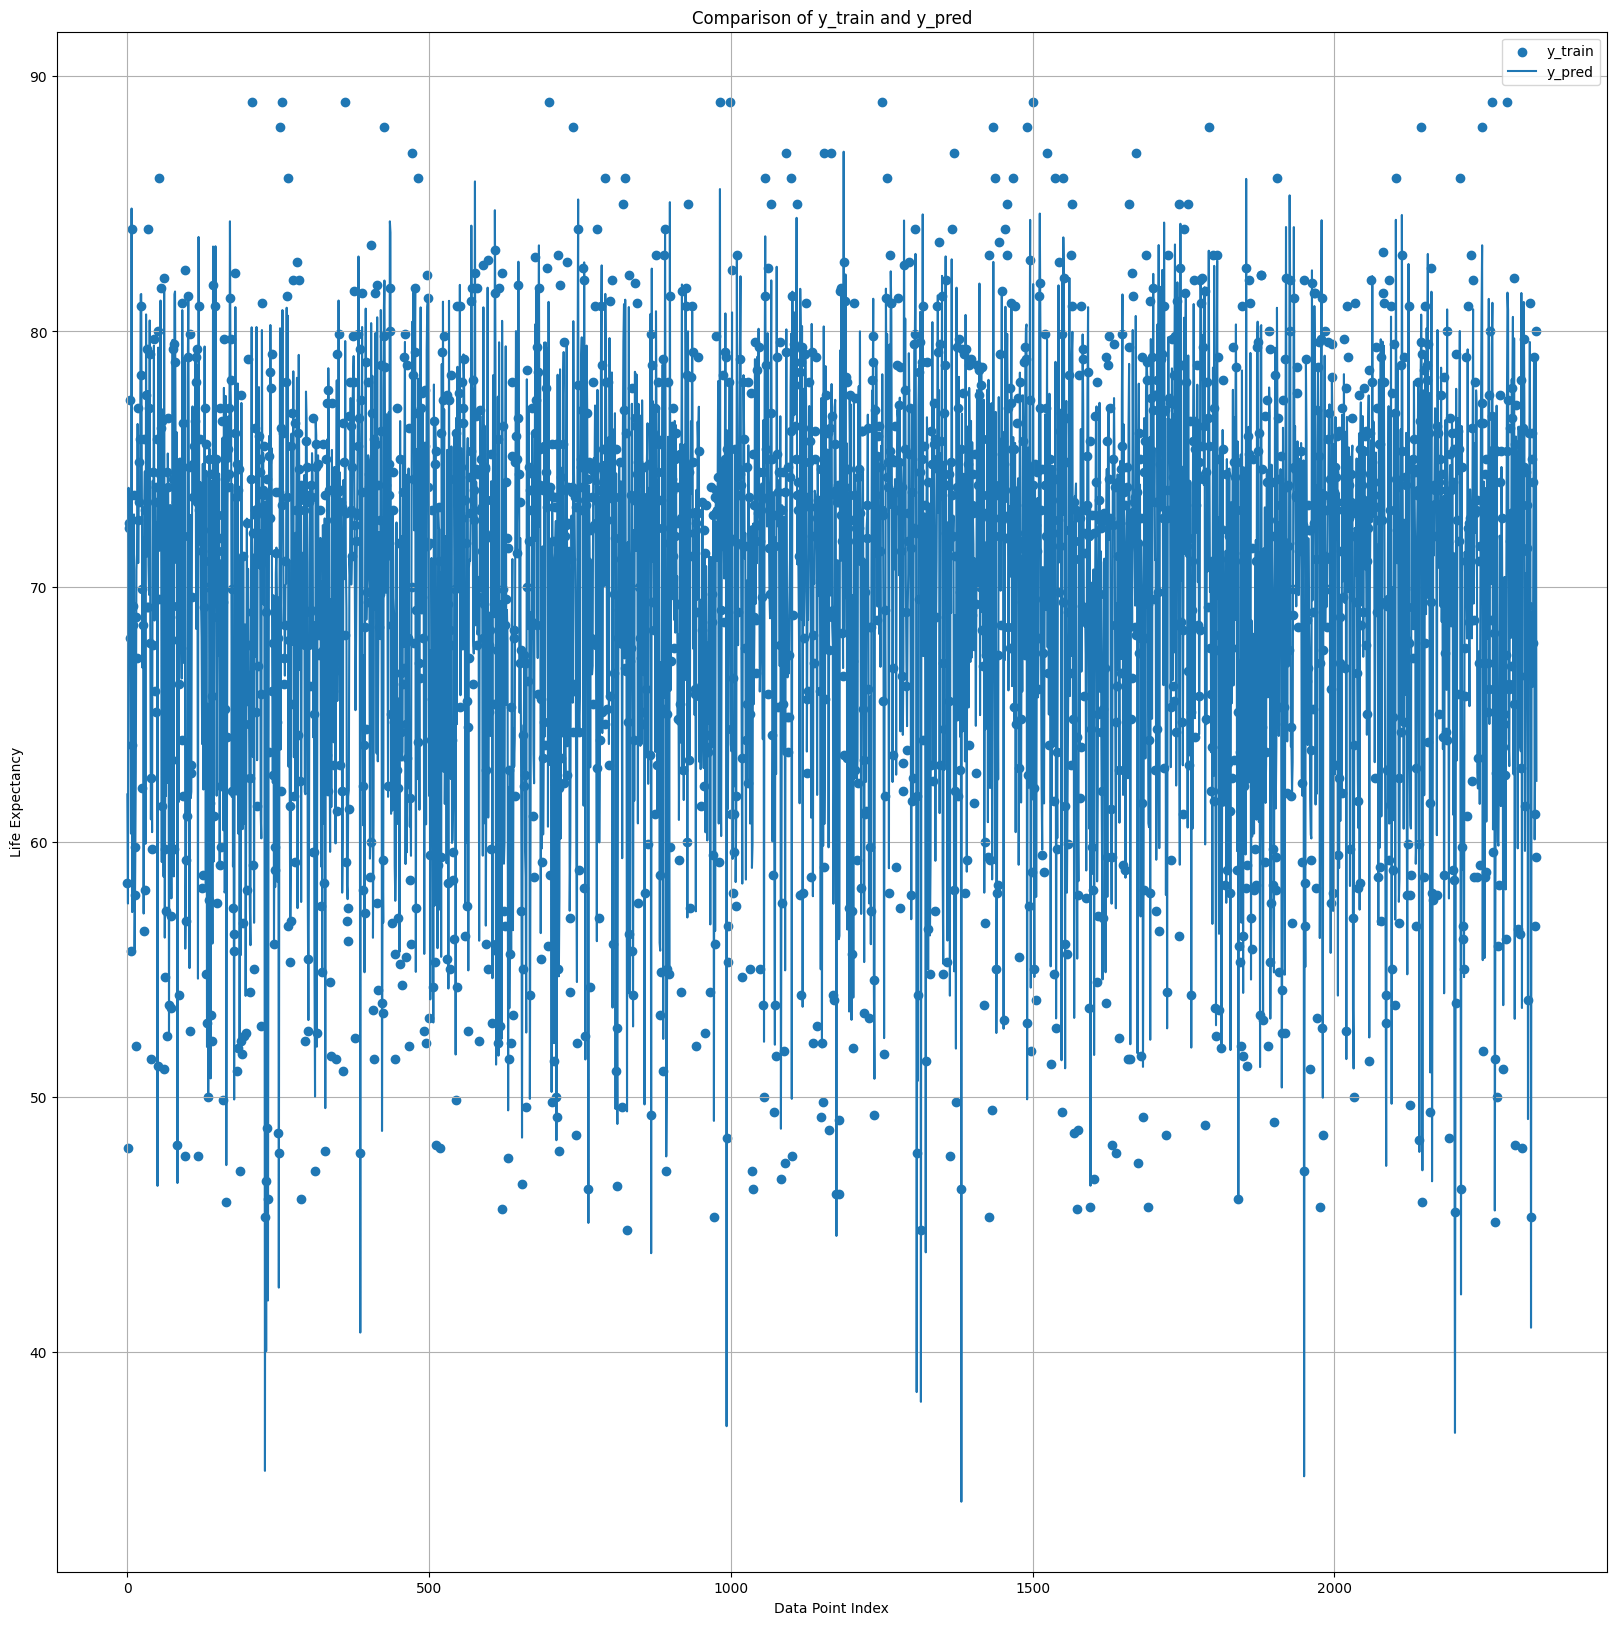

In [51]:
plt.figure(figsize=(20,20))
plt.scatter(range(len(x_train)), y_train, label='y_train')
plt.plot(range(len(x_train)), y_pred, label='y_pred')
plt.xlabel('Data Point Index')
plt.ylabel('Life Expectancy')
plt.title('Comparison of y_train and y_pred')
plt.legend()
plt.grid(True)
plt.show()

**Testing**

In [52]:
y_predict=func(x_test,w,b)
r2 = r2_score(y_test, y_predict)
print(f"R-squared score: {r2}")

R-squared score: 0.8030711729590023


# Multiple Linear Regression with Lasso(L1) Regularization

In [44]:
def gd_lasso(x_train,y_train,w,b,alpha):
  w_grad=np.zeros((x_train.shape[1]))
  b_grad=0
  for i in range(m):
    y_pred=func(x_train[i],w,b)
    w_grad+=(y_pred-y_train[i])*x_train[i]
    b_grad+=(y_pred-y_train[i])
  w_grad=w_grad/m
  b_grad=b_grad/m

  # Lasso regularization term
  for j in range(len(w)):
      if w[j] > 0:
          w_grad[j] += alpha
      elif w[j] < 0:
          w_grad[j] -= alpha

  return w_grad,b_grad

In [45]:
def gradient(x_train,y_train,w,b,iters,lr,alpha):
  for i in range(iters):
    w_,b_=gd_lasso(x_train,y_train,w,b,alpha)
    w=w-lr*w_
    b=b-lr*b_
  return w,b

In [53]:
alpha = 0.05
lr=0.01
iters=1000
w1=np.zeros((x_train.shape[1]))
b1=0
w1, b1 = gradient(x_train, y_train, w1, b1, iters, lr, alpha)
print("Weights:", w1)
print("Bias:", b1)

Weights: [-3.89811284e-03  4.97267685e-01 -2.55881724e+00  5.07547068e-04
  1.44135566e-01  1.87234221e-01 -3.39424626e-01 -3.50360269e-01
  8.14902682e-01 -2.02728603e-01  6.58170561e-01  2.10843530e-01
  1.06434329e+00 -2.28816426e+00  3.72753057e-01  6.86824399e-02
 -2.48492864e-01 -4.23082234e-02  1.33482767e+00  2.11949790e+00]
Bias: 69.41297045793311


In [57]:
y_pred=func(x_train,w1,b1)
r2 = r2_score(y_train, y_pred)
print(f"R-squared score for training data with Lasso Regularization: {r2}")

R-squared score for training data with Lasso Regularization: 0.8122349331922649


In [56]:
y_predict=func(x_test,w1,b1)
r2 = r2_score(y_test, y_predict)
print(f"R-squared score for testing data with Lasso Regularization: {r2}")

R-squared score for testing data with Lasso Regularization: 0.8030711729590023


**Random Prediction**

In [61]:
import numpy as np
random_values = np.random.rand(x_test.shape[1])
random_values = random_values.reshape(1, -1)
print(f"random input: {random_values}")
y_predicted_random = func(random_values, w1, b1)

print(f"Predicted y value for random input: {y_predicted_random[0]} years")


random input: [[0.1993567  0.92835796 0.15973702 0.11755564 0.58181413 0.8413962
  0.43825385 0.81745789 0.66480703 0.25787877 0.5317601  0.70418146
  0.26361965 0.71640923 0.06681185 0.63774351 0.74561359 0.45081721
  0.73369878 0.3101646 ]]
Predicted y value for random input: 70.40175914316715 years


# Feture Selection after Lasso Regularization and model evaluation- Direct Method

In [74]:
threshold = -0.1
selected_features = np.where(np.abs(w1) > threshold)[0]
X_train_selected = x_train[:, selected_features]
X_test_selected = x_test[:, selected_features]

In [72]:
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test_selected)
r2 = r2_score(y_test, y_pred)
print("r2 score with selected features:", r2)

r2 score with selected features: 0.811854796684074
